In [1]:
import numpy as np

import scipy.constants as cs
from scipy.optimize import curve_fit
import scipy.ndimage as ndimage
from ImageProcessing import *

import matplotlib.pyplot as plt
import matplotlib.scale as scale

import tqdm
import scipy.io

import csv

# Loading Data

In [2]:
data = scipy.io.loadmat('jun1_run9.mat')
n_loops = 20
lattice_shape = np.array([10, 10])
stack = data['stack']

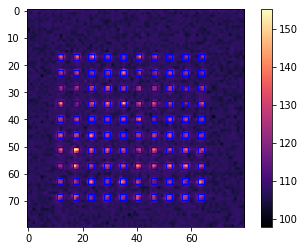

In [3]:
processor = GreenImageProcessor(stack, lattice_shape, 20)
processor.plot()

In [61]:
upper_threshold = 113
lower_threshold = 107
crops, labels = processor.make_dataset(lower_threshold, upper_threshold, 1)

1
1


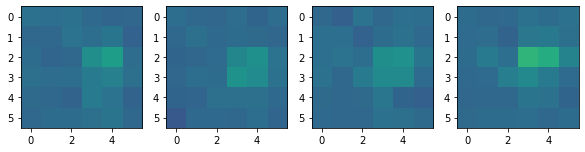

In [62]:

i, j, k = np.random.randint(processor.n_tweezers), np.random.randint(processor.n_loops), np.random.randint(processor.per_loop - 4)

fig, axs = plt.subplots(1, 4, figsize=(10, 20))

for n in range(4):
    axs[n].imshow(crops[processor.crop_index(i, j, k + n)], vmin=processor.stack.min(), vmax=processor.stack.max())

77


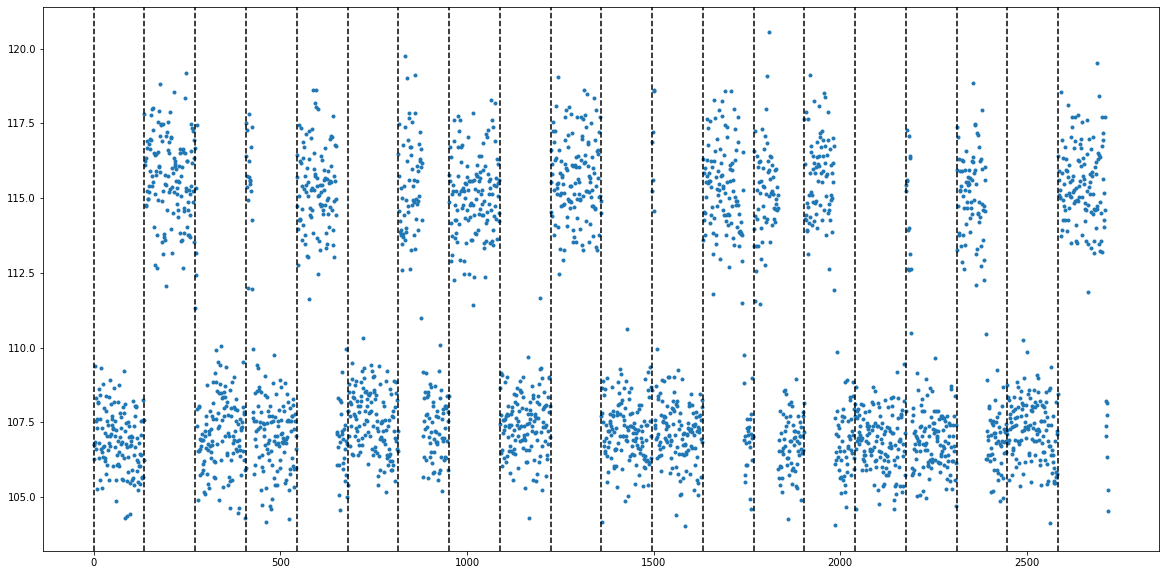

In [63]:
#i = 0
plt.figure(figsize=(20, 10))
plt.plot(np.mean(crops[processor.crop_index(i, 0, 0): processor.crop_index(i + 1, 0, 0) - 1], axis=(1, 2)), '.')
print(i)
for i in range(n_loops):
    plt.axvline(i * processor.per_loop, color='k', linestyle='--')

In [64]:
tweezer = 96
tweezer_vals = np.mean(crops[processor.crop_index(tweezer, 0, 0): processor.crop_index(tweezer + 1, 0, 0)], axis=(1, 2))
tweezer_labels = labels[processor.crop_index(tweezer, 0, 0): processor.crop_index(tweezer + 1, 0, 0)]

bright_mask = tweezer_labels == 1
dark_mask = tweezer_labels == 0
unknown_mask = np.isnan(tweezer_labels)

bright_indices = np.where(bright_mask)[0]
bright_vals = tweezer_vals[bright_mask]

dark_indices = np.where(dark_mask)[0]
dark_vals = tweezer_vals[dark_mask]

unknown_indices = np.where(unknown_mask)[0]
unknown_vals = tweezer_vals[unknown_mask]


58


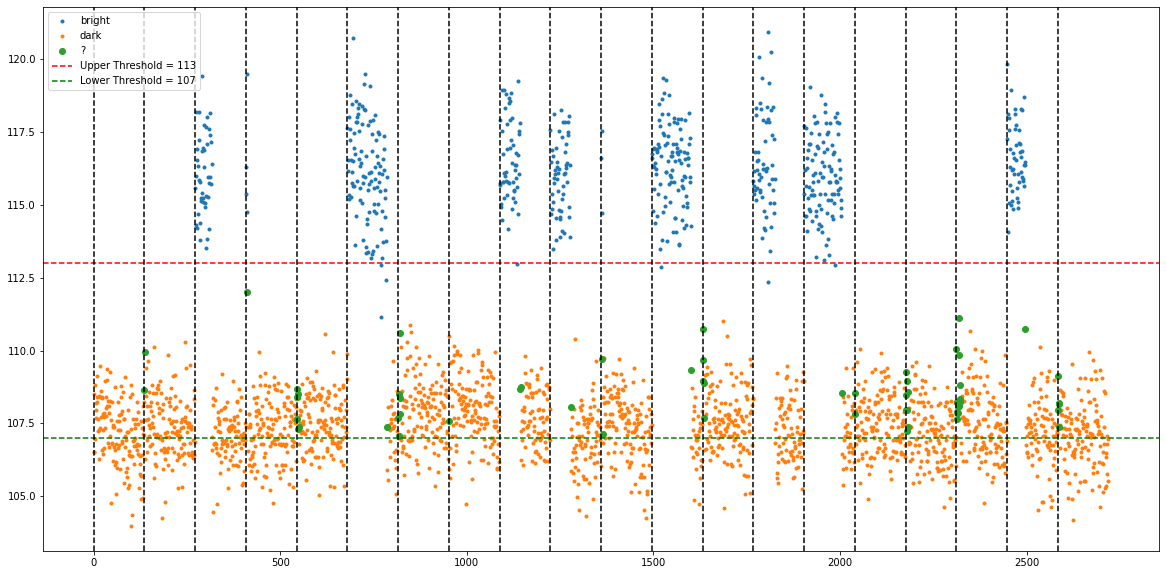

In [67]:
print(len(unknown_vals))
plt.figure(figsize=(20, 10))
plt.plot(bright_indices, bright_vals, '.', label='bright')
plt.plot(dark_indices, dark_vals, '.', label='dark')
plt.plot(unknown_indices, unknown_vals, 'o', label='?')
plt.axhline(upper_threshold, color='r', linestyle='--', label=f"Upper Threshold = {upper_threshold}")
plt.axhline(lower_threshold, color='g', linestyle='--', label=f"Lower Threshold = {lower_threshold}")
plt.legend()
for i in range(n_loops):
    plt.axvline(i * processor.per_loop, color='k', linestyle='--')

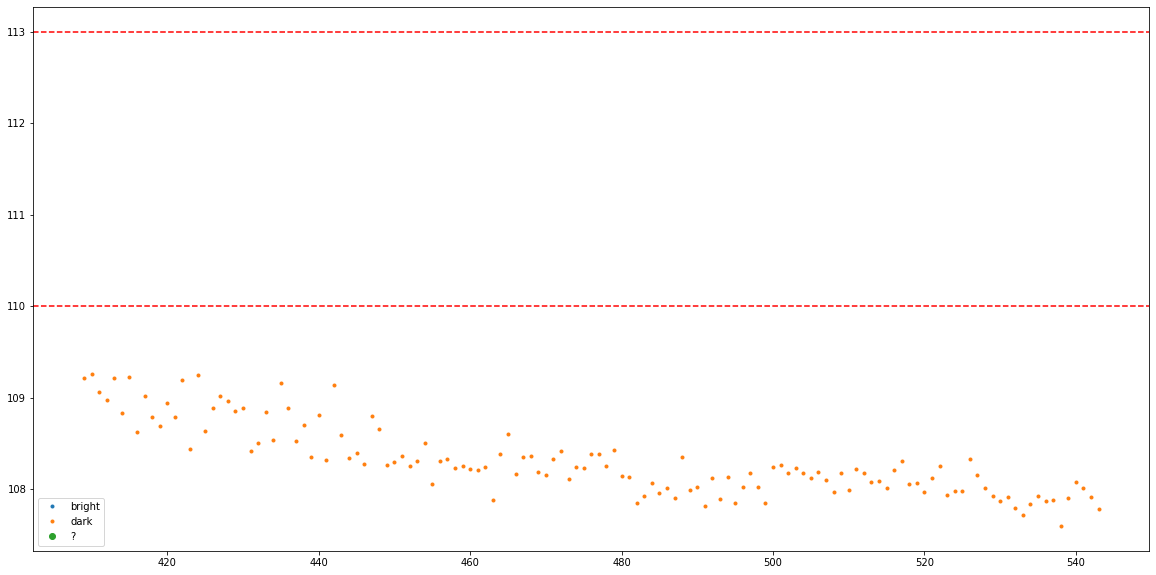

In [ ]:
loop_num = 3
low = processor.per_loop * loop_num
high = processor.per_loop * (loop_num + 1)
bright_mask = (low < bright_indices) & (bright_indices < high)
dark_mask = (low < dark_indices) & (dark_indices < high)
unknown_mask = (low < unknown_indices) & (unknown_indices < high)

plt.figure(figsize=(20, 10))
plt.plot(bright_indices[bright_mask], bright_vals[bright_mask], '.', label='bright')
plt.plot(dark_indices[dark_mask], dark_vals[dark_mask], '.', label='dark')
plt.plot(unknown_indices[unknown_mask], unknown_vals[unknown_mask], 'o', label='?')
plt.axhline(high_threshold, color='r', linestyle='--')
plt.axhline(low_threshold, color='r', linestyle='--')
plt.legend()

In [ ]:
labels = processor.make_labels(107, 113)

0 0 1 136
136 136 138 272
272 272 272 408
408 408 410 544
544 544 545 680
680 680 680 816
816 816 816 952
952 952 953 1088
1088 1088 1090 1224
1224 1224 1225 1360
1360 1360 1360 1496
1496 1496 1496 1632
1632 1632 1637 1768
1768 1768 1769 1904
1904 1904 1904 2040
2040 2040 2040 2176
2176 2176 2179 2312
2312 2312 2313 2448
2448 2448 2449 2584
2584 2584 2584 2720
2720 2720 2721 2856
2856 2856 2856 2992
2992 2992 2993 3128
3128 3128 3129 3264
3264 3264 3264 3400
3400 3400 3401 3536
3536 3536 3539 3672
3672 3672 3673 3808
3808 3808 3809 3944
3944 3944 3945 4080
4080 4080 4081 4216
4216 4216 4217 4352
4352 4352 4352 4488
4488 4488 4489 4624
4624 4624 4625 4760
4760 4760 4763 4896
4896 4896 4898 5032
5032 5032 5033 5168
5168 5168 5169 5304
5304 5304 5305 5440
5440 5440 5441 5576
5576 5576 5576 5712
5712 5712 5713 5848
5848 5848 5849 5984
5984 5984 5985 6120
6120 6120 6121 6256
6256 6256 6258 6392
6392 6392 6393 6528
6528 6528 6529 6664
6664 6664 6666 6800
6800 6800 6802 6936
6936 6936 6940 70

# TODO
* Fine tune the thresholds for labeling 
* Train model for green imaging
* Find out how to save and load model